In [1]:
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"
import torch
import numpy as np

from src.clusters import HierarchicalCluster
from src import (
  hierarchical_kmeans_gpu as hkmg,
  hierarchical_sampling as hs
)
from matplotlib import pyplot as plt
import pandas as pd
from cuml.manifold.umap import UMAP
import altair as alt
import base64
import io
from PIL import Image


from matplotlib.colors import LogNorm
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from io import BytesIO
from reportlab.lib.utils import ImageReader



In [5]:
features = np.load("/home/tcecconello/radioimgs/radio-data-curation-ssl/features/features_clip/features.npy")

In [9]:
#features = np.load("/home/tcecconello/radioimgs/radio-data-curation-ssl/features/features.npy")
info = pd.read_json("/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/info.json", orient="index")
info.head()

,file_path,source_type,survey,mosaic_name,position,size
0,/home/tcecconello/radioimgs/radio-data-curatio...,UNKNOWN,LoTTS,P334+36,"[128, 3968]",256
1,/home/tcecconello/radioimgs/radio-data-curatio...,UNKNOWN,LoTTS,P334+36,"[128, 4096]",256
2,/home/tcecconello/radioimgs/radio-data-curatio...,UNKNOWN,LoTTS,P334+36,"[128, 4224]",256
3,/home/tcecconello/radioimgs/radio-data-curatio...,UNKNOWN,LoTTS,P334+36,"[128, 4352]",256
4,/home/tcecconello/radioimgs/radio-data-curatio...,UNKNOWN,LoTTS,P334+36,"[128, 4480]",256


In [2]:
cl = HierarchicalCluster.from_file("/home/tcecconello/radioimgs/radio-data-curation-ssl/data/try_3_clip", levels=2)

In [3]:
cl.clusters

{1: array([array([1106815, 1578034, 2449133,  106823, 2241465,  357532, 3065793,
               2449417,  423594, 2004655, 2261061,  157599, 2846951, 2123348,
               2489671, 1611624,  948266, 2693145, 1479569, 1190885, 1083145,
               2764624, 3093221, 1264478,  456923, 1961508, 2089179, 1407254,
               2309568,  326206, 1415408, 2179083, 1144246, 1959938, 1330235,
               2353961, 1406185, 1520067, 1839517, 1088009,  338531,  568903,
                 50081, 2595988, 2183952, 1325547, 2367967,  620013, 1467461,
                964474,  988950, 2072892,   58232,  576469, 3070009, 2823392,
                480077, 1487174,  177482,  228329, 1725862,    8244, 2730984,
               1639029,  452365, 1967277,  682738, 1492958,  916649, 1676928,
               2304765, 1236430, 2844648,  759034,   36023,   61279,  144121,
                 50105,  474532, 2970311, 1134587,  964522,  341454, 1409565,
                180798, 2903406, 1755068,  326455, 2340368,  

In [4]:

#cl = HierarchicalCluster.from_file("/home/tcecconello/radioimgs/radio-data-curation-ssl/data/try_1")
cl = HierarchicalCluster.from_file("/home/tcecconello/radioimgs/radio-data-curation-ssl/data/try_3_clip")
sampled_indices = hs.hierarchical_sampling(cl, target_size=200000)

Hierarchical sampling from clusters: 100%|██████████| 10000/10000 [00:01<00:00, 5204.91it/s]


In [4]:
print("Numerosità media dei cluster per livello \n Livello 1:{} \n Livello 2:{} \n Livello 3:{}".format(np.mean(cl.clusters_size[1]), np.mean(cl.clusters_size[2]), np.mean(cl.clusters_size[3])))
print("Numerosità massima dei cluster per livello \n Livello 1:{} \n Livello 2:{} \n Livello 3:{}".format(np.max(cl.clusters_size[1]), np.max(cl.clusters_size[2]), np.max(cl.clusters_size[3])))


Numerosità media dei cluster per livello 
 Livello 1:31.08232 
 Livello 2:10.0 
 Livello 3:3.3333333333333335
Numerosità massima dei cluster per livello 
 Livello 1:2477742 
 Livello 2:61 
 Livello 3:20


In [24]:
cl.clusters[3]

array([array([1830, 7653, 4740]),
       array([ 7629, 18933, 14944,  5428, 13111, 15581,  9510, 16366,   233,
              13321, 18586,  6543, 19382, 16433,  3304, 10816, 16757,  9806,
               3664, 11710,  8435])                                         ,
       array([1390]), ...,
       array([16855, 10589,   584, 14534, 15775, 10973,    12, 15833,  8262,
              11380,  8898,  5509,  2492, 18373, 14005])                    ,
       array([2801]),
       array([19264,   417, 15834,  8613, 17551, 12897, 16816, 14720, 10751,
              13917,  7808, 12665, 17048, 14786, 16058, 12486, 11947,  6270])],
      dtype=object)

In [5]:
# running default. Runs with NN Descent if data has more than 50K points
umap = UMAP(n_neighbors=60,min_dist=0.2)

emb  = umap.fit_transform(features)



In [8]:
umap_reduced = UMAP(n_neighbors=60,min_dist=0.2)
emb_reduced  = umap_reduced.fit_transform(features[sampled_indices])

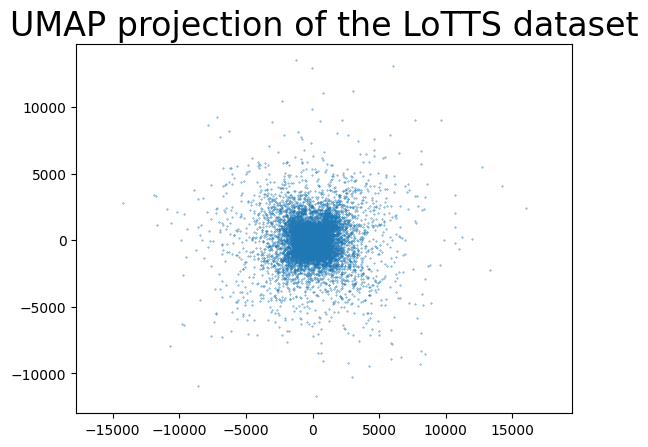

In [7]:
plt.scatter(
    emb[:, 0],
    emb[:, 1],
    s = 0.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the LoTTS dataset', fontsize=24);

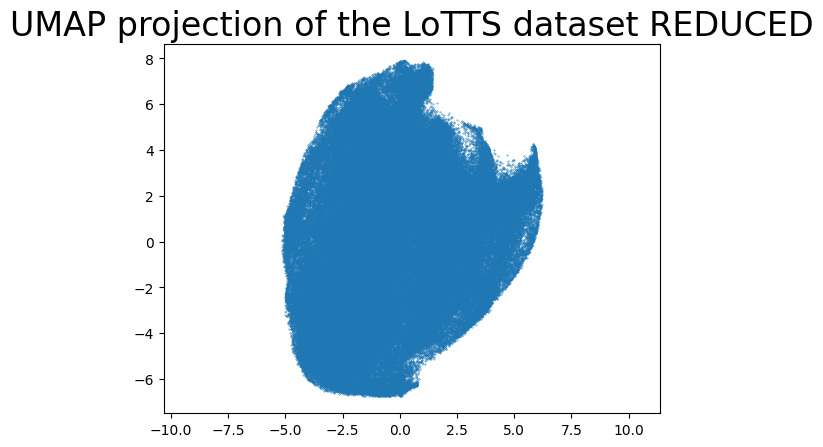

In [9]:
plt.scatter(
    emb_reduced[:, 0],
    emb_reduced[:, 1],
    s = 0.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the LoTTS dataset REDUCED', fontsize=24);

/tmp/ipykernel_2370712/2691274709.py:54: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.HConcatChart(...)
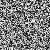
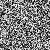
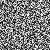
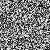
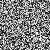
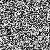
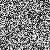
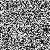
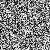
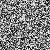

In [16]:


# Genera dati di esempio
np.random.seed(42)
coordinates = np.random.rand(10, 2)
images = [np.random.rand(50, 50) for _ in range(10)]

def img_to_base64(img):
    img_scaled = ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)
    pil_img = Image.fromarray(img_scaled)
    buffer = io.BytesIO()
    pil_img.save(buffer, format='PNG')
    return f"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"

# Prepara DataFrame
df = pd.DataFrame({
    'x': coordinates[:,0], 
    'y': coordinates[:,1],
    'image': [img_to_base64(img) for img in images],
    'index': range(len(coordinates))
})

# Scatter plot base
points = alt.Chart(df).mark_point().encode(
    x=alt.X('x', title='X Coordinate'),
    y=alt.Y('y', title='Y Coordinate'),
    #color=alt.Color('index:N', scale=alt.Scale(scheme='blues')),
    tooltip=['index']
).properties(
    width=600,
    height=400,
    title='Interactive Image Coordinates'
)

# Seleziona punto al click
selector = alt.selection_point(fields=['index'])

# Mostra immagine selezionata
image_display = alt.Chart(df).mark_image(
    width=200,
    height=200
).encode(
    url='image:N'
).transform_filter(
    selector
)

# Combina scatter e display immagine
final_chart = points.add_selection(
    selector
) | image_display

# Mostra grafico
final_chart

In [ ]:
# Enable VegaFusion data transformer
alt.data_transformers.enable('vegafusion')


def create_interactive_chart(df):
    # Scatter plot base
    points = alt.Chart(df).mark_point().encode(
        x=alt.X('x', title='X Coordinate'),
        y=alt.Y('y', title='Y Coordinate'),
        tooltip=['index', 'image_path']
    ).properties(
        width=600,
        height=400,
        title='Interactive Image Coordinates'
    )

    # Seleziona punto al click
    selector = alt.selection_point(fields=['index'])

    # Funzione per convertire numpy array in base64
    def numpy_to_base64(path):
        log_scale = 100
        img = np.load(path)
        img_eq = (img - img.min()) / (img.max() - img.min())
        img_log = np.log1p(log_scale * (img_eq - np.min(img_eq)))
        img_normalized = (img_log - img_log.min()) / (img_log.max() - img_log.min())
        img_scaled = (img_normalized * 255).astype(np.uint8)
        pil_img = Image.fromarray(img_scaled, mode='L')
        buffer = io.BytesIO()
        pil_img.save(buffer, format='PNG')
        return f"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"

    # Aggiungi colonna base64 al dataframe
    df['image_base64'] = df['image_path'].apply(numpy_to_base64)

    # Mostra immagine selezionata
    image_display = alt.Chart(df).mark_image(
        width=200,
        height=200
    ).encode(
        url='image_base64:N'
    ).transform_filter(
        selector
    )

    # Combina scatter e display immagine
    final_chart = points.add_selection(
        selector
    ) | image_display

    return final_chart


df = pd.DataFrame({
    'x': emb_reduced[:,0], 
    'y': emb_reduced[:,1],
    'image_path': info.iloc[sampled_indices].file_path,
    'index': range(len(emb_reduced))
})

# Esegui l'esempio
#df = generate_sample_data()
final_chart = create_interactive_chart(df)
final_chart

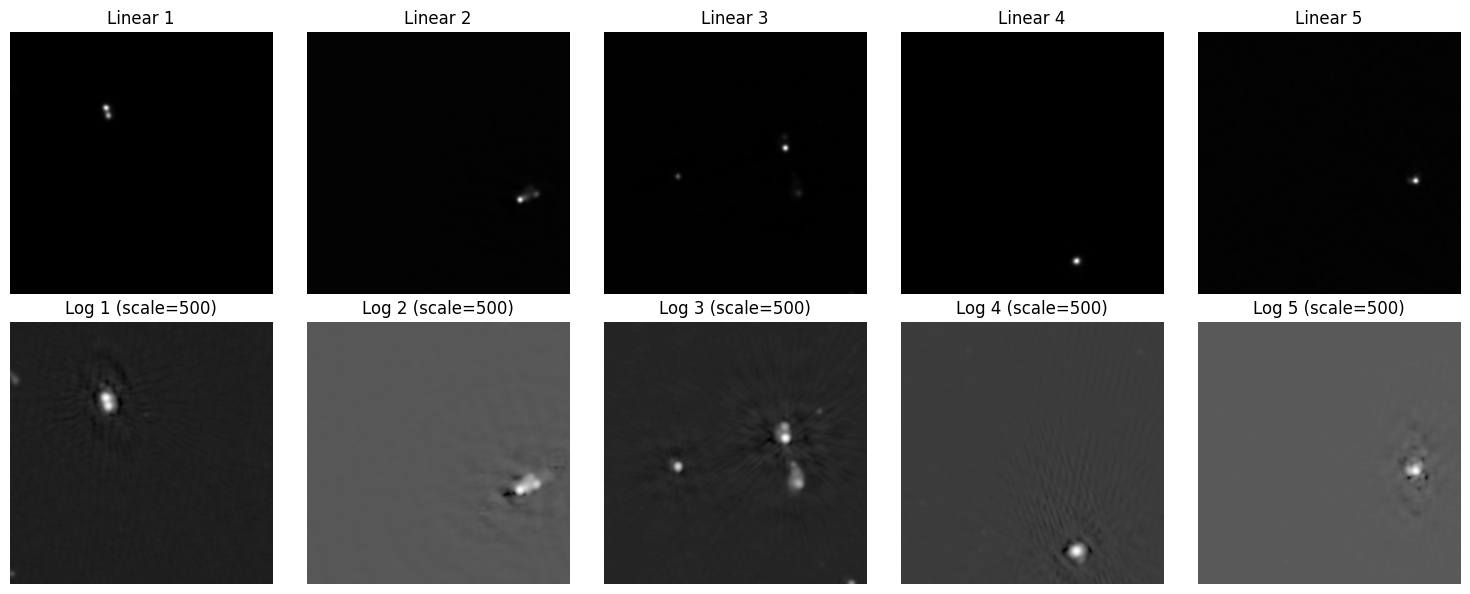

In [16]:
selected_rows = info.loc[sampled_indices].sample(5)

log_scale = 500  # Aumenta o diminuisci questo valore per cambiare la compressione

# Inizializza il subplot con due righe: una per la scala lineare e una per quella logaritmica
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, file_path in enumerate(selected_rows['file_path']):
    # Carica il file numpy
    img = np.load(file_path)
    
    # Normalizzazione in scala lineare
    img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Normalizzazione in scala logaritmica con parametro di scala
    img_log = np.log1p(log_scale * (img - np.min(img)))
    img_log_normalized = (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))
    
    # Visualizza l'immagine in scala lineare
    axes[0, idx].imshow(img_normalized, cmap='gray')
    axes[0, idx].set_title(f"Linear {idx+1}")
    axes[0, idx].axis('off')  # Rimuove gli assi
    
    # Visualizza l'immagine in scala logaritmica
    axes[1, idx].imshow(img_log_normalized, cmap='gray')
    axes[1, idx].set_title(f"Log {idx+1} (scale={log_scale})")
    axes[1, idx].axis('off')  # Rimuove gli assi

plt.tight_layout()
plt.show()

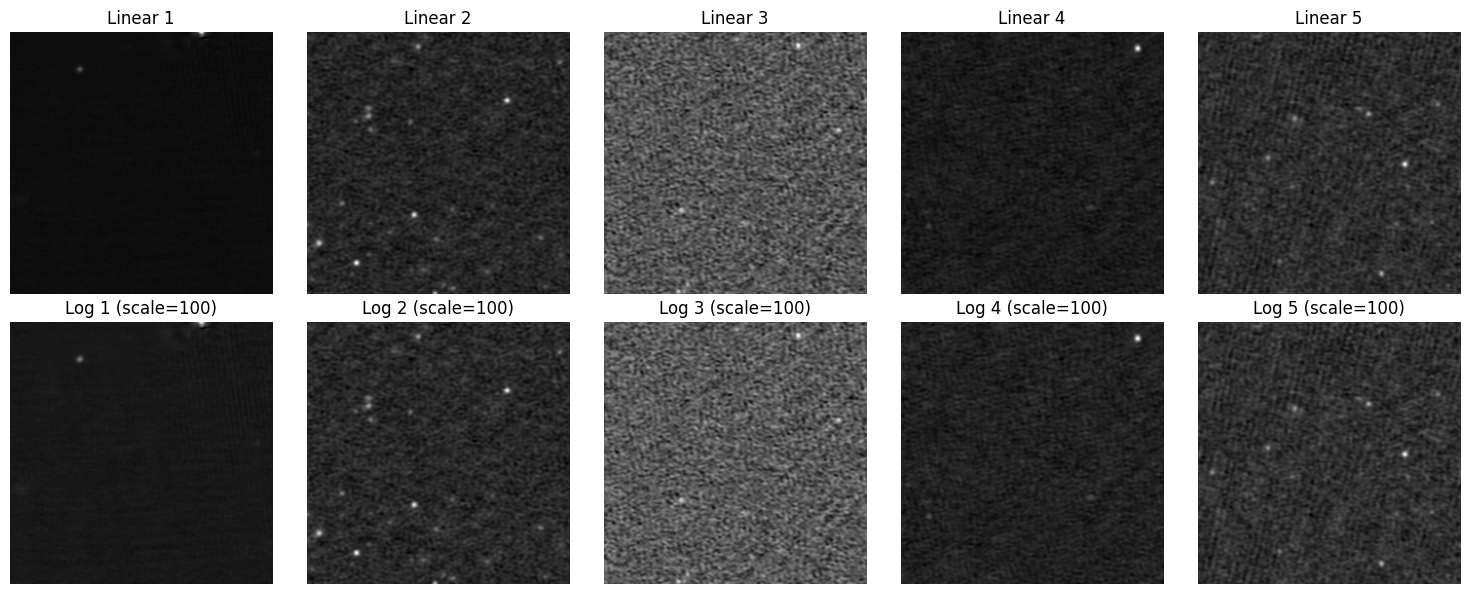

In [19]:
selected_rows = info.sample(5)

log_scale = 100  # Aumenta o diminuisci questo valore per cambiare la compressione

# Inizializza il subplot con due righe: una per la scala lineare e una per quella logaritmica
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, file_path in enumerate(selected_rows['file_path']):
    # Carica il file numpy
    img = np.load(file_path)
    
    # Normalizzazione in scala lineare
    img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Normalizzazione in scala logaritmica con parametro di scala
    img_log = np.log1p(log_scale * (img - np.min(img)))
    img_log_normalized = (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))
    
    # Visualizza l'immagine in scala lineare
    axes[0, idx].imshow(img_normalized, cmap='gray')
    axes[0, idx].set_title(f"Linear {idx+1}")
    axes[0, idx].axis('off')  # Rimuove gli assi
    
    # Visualizza l'immagine in scala logaritmica
    axes[1, idx].imshow(img_log_normalized, cmap='gray')
    axes[1, idx].set_title(f"Log {idx+1} (scale={log_scale})")
    axes[1, idx].axis('off')  # Rimuove gli assi

plt.tight_layout()
plt.show()

In [ ]:
Stampare PDF con solo logarigmica
Visualizzare clusters
    Noi sappiamo quali indici appartengono a quali cluster, possiamo quindi visualizzare cluster per cluster e vedere quali sono state selezionate e a quale livello
    Per ogni cluster possiamo anche visualizzare i sottoclusters facendo la stessa cosa

In [15]:
# Funzione per normalizzare e applicare la scala logaritmica
def process_image(image, log_param=500):
    img = image.astype(float)
    img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
    img_log = np.log1p(log_param * (img - np.min(img)))
    return (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))

# Funzione per aggiungere un contorno colorato
def add_border(image, color, border_width=5):
    h, w = image.shape
    bordered_image = np.zeros((h + 2 * border_width, w + 2 * border_width, 3))
    bordered_image[:, :, 0] = color[0]
    bordered_image[:, :, 1] = color[1]
    bordered_image[:, :, 2] = color[2]
    bordered_image[border_width:-border_width, border_width:-border_width, :] = np.stack([image] * 3, axis=-1)
    return bordered_image

# Creazione del PDF
pdf_path = "dataset_images.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
page_width, page_height = letter

# Dimensioni della griglia
columns = 5
rows = 10
margin = 10
cell_width = (page_width - (columns + 1) * margin) / columns
cell_height = (page_height - (rows + 1) * margin) / rows

x_positions = [margin + i * (cell_width + margin) for i in range(columns)]
y_positions = [page_height - margin - (j + 1) * (cell_height + margin) for j in range(rows)]

def save_image_to_canvas(image, x, y, width, height, canvas):
    # Crea un buffer in memoria
    buffer = BytesIO()
    plt.imsave(buffer, image, cmap="gray", format="png")  # Salva l'immagine nel buffer
    buffer.seek(0)  # Riposiziona il puntatore all'inizio del buffer
    
    # Usa ImageReader per caricare l'immagine dal buffer
    img = ImageReader(buffer)
    canvas.drawImage(img, x, y, width=width, height=height)
    buffer.close()  # Libera il buffer

image_count = 0
for idx, row in info.iloc[range(10000)].iterrows():
    file_path = row["file_path"]
    print(idx)
    image = np.load(file_path)
    image = process_image(image)

    # Aggiungi il contorno
    if idx in sampled_indices:
        color = [0, 1, 0]  # Verde
    else:
        color = [1, 0, 0]  # Rosso

    bordered_image = add_border(image, color)

    # Calcola la posizione nella griglia
    col = image_count % columns
    row = (image_count // columns) % rows

    x = x_positions[col]
    y = y_positions[row]

    # Ridimensiona e aggiungi l'immagine al canvas
    save_image_to_canvas(bordered_image, x, y, cell_width, cell_height, c)

    image_count += 1

    # Se la griglia è piena, passa alla pagina successiva
    if image_count % (columns * rows) == 0:
        c.showPage()

# Salva il PDF
c.save()
print(f"PDF creato: {pdf_path}")

/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_3968.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4096.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4224.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4352.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4480.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4608.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4736.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4864.npy
/home/tcecconello/radioimgs/radio-data-curation-ssl/LoTSS/cutouts/sw_cutouts_256/P334+36/npy/patch_128_4

In [5]:
# Funzione per normalizzare e applicare la scala logaritmica
def process_image(image, log_param=500):
    img = image.astype(float)
    img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
    img_log = np.log1p(log_param * (img - np.min(img)))
    return (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))

# Funzione per aggiungere un contorno colorato
def add_border(image, color, border_width=5):
    h, w = image.shape
    bordered_image = np.zeros((h + 2 * border_width, w + 2 * border_width, 3))
    bordered_image[:, :, 0] = color[0]
    bordered_image[:, :, 1] = color[1]
    bordered_image[:, :, 2] = color[2]
    bordered_image[border_width:-border_width, border_width:-border_width, :] = np.stack([image] * 3, axis=-1)
    return bordered_image

# Creazione del PDF
pdf_path = "dataset_images_clip_200000_reduced_1000samples.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
page_width, page_height = letter

# Dimensioni della griglia
columns = 7
rows = 10
margin = 10
cell_width = (page_width - (columns + 1) * margin) / columns
cell_height = (page_height - (rows + 1) * margin) / rows

x_positions = [margin + i * (cell_width + margin) for i in range(columns)]
y_positions = [page_height - margin - (j + 1) * (cell_height + margin) for j in range(rows)]

def save_image_to_canvas(image, x, y, width, height, canvas):
    # Crea un buffer in memoria
    buffer = BytesIO()
    plt.imsave(buffer, image, cmap="gray", format="png")  # Salva l'immagine nel buffer
    buffer.seek(0)  # Riposiziona il puntatore all'inizio del buffer
    
    # Usa ImageReader per caricare l'immagine dal buffer
    img = ImageReader(buffer)
    canvas.drawImage(img, x, y, width=width, height=height)
    buffer.close()  # Libera il buffer

image_count = 0
for idx, row in info.iloc[sampled_indices].sort_index(ascending=True).iloc[range(1000)].iterrows():
    file_path = row["file_path"]
    #print(idx)
    image = np.load(file_path)
    image = process_image(image)

    # Calcola la posizione nella griglia
    col = image_count % columns
    row = (image_count // columns) % rows

    x = x_positions[col]
    y = y_positions[row]

    # Ridimensiona e aggiungi l'immagine al canvas
    save_image_to_canvas(image, x, y, cell_width, cell_height, c)

    image_count += 1

    # Se la griglia è piena, passa alla pagina successiva
    if image_count % (columns * rows) == 0:
        c.showPage()

# Salva il PDF
c.save()
print(f"PDF creato: {pdf_path}")

PDF creato: dataset_images_clip_200000_reduced_1000samples.pdf


In [37]:
def save_image_to_canvas(image, x, y, width, height, canvas):
    # Crea un buffer in memoria
    buffer = BytesIO()
    plt.imsave(buffer, image, cmap="gray", format="png")  # Salva l'immagine nel buffer
    buffer.seek(0)  # Riposiziona il puntatore all'inizio del buffer
    
    # Usa ImageReader per caricare l'immagine dal buffer
    img = ImageReader(buffer)
    canvas.drawImage(img, x, y, width=width, height=height)
    buffer.close()  # Libera il buffer
# Funzione per aggiungere un contorno colorato
def add_border(image, color, border_width=5):
    h, w = image.shape
    bordered_image = np.zeros((h + 2 * border_width, w + 2 * border_width, 3))
    bordered_image[:, :, 0] = color[0]
    bordered_image[:, :, 1] = color[1]
    bordered_image[:, :, 2] = color[2]
    bordered_image[border_width:-border_width, border_width:-border_width, :] = np.stack([image] * 3, axis=-1)
    return bordered_image
# Funzione per normalizzare e applicare la scala logaritmica
def process_image(image, log_param=500):
    img = image.astype(float)
    img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
    img_log = np.log1p(log_param * (img - np.min(img)))
    return (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))
# Funzione per processare i cluster
def process_cluster(cluster, sampled_indices):
    #print(cluster)
    cluster = np.array(cluster)
    #print(cluster)
    #print(sampled_indices)
    sampled = [x for x in cluster if x in sampled_indices]
    not_sampled = [x for x in cluster if x not in sampled_indices]

    if len(cluster) <= 6:
        return cluster  # Ritorna tutto il cluster se ha meno di 6 elementi
    else:
        # Prendi 3 elementi da ciascun gruppo (se possibile)
        sampled_sample = sampled[:3] if len(sampled) >= 3 else sampled
        not_sampled_sample = not_sampled[:3] if len(not_sampled) >= 3 else not_sampled
        return np.array(sampled_sample + not_sampled_sample)

# Modifica per stampare i cluster nel PDF
def save_clusters_to_pdf(clusters, sampled_indices, info, pdf_path):
    c = canvas.Canvas(pdf_path, pagesize=letter)
    page_width, page_height = letter

    # Dimensioni della griglia
    columns = 6
    rows = 10
    margin = 10
    cell_width = (page_width - (columns + 1) * margin) / columns
    cell_height = (page_height - (rows + 1) * margin) / rows

    x_positions = [margin + i * (cell_width + margin) for i in range(columns)]
    y_positions = [page_height - margin - (j + 1) * (cell_height + margin) for j in range(rows)]

    image_count = 0
    #print(clusters)
    for cluster in clusters:
        sampled_cluster = process_cluster(cluster, sampled_indices)

        for idx in sampled_cluster:
            # Carica il percorso dell'immagine dal dataframe
            file_path = info.loc[idx]['file_path']
            image = np.load(file_path)
            image = process_image(image)

            # Determina il colore del bordo
            color = [0, 1, 0] if idx in sampled_indices else [1, 0, 0]
            bordered_image = add_border(image, color)

            # Calcola la posizione nella griglia
            col = image_count % columns
            row = (image_count // columns) % rows

            x = x_positions[col]
            y = y_positions[row]

            # Aggiungi l'immagine al canvas
            save_image_to_canvas(bordered_image, x, y, cell_width, cell_height, c)

            image_count += 1

            # Se la griglia è piena, passa alla pagina successiva
            if image_count % (columns * rows) == 0:
                c.showPage()

        # Inserisce un separatore tra i cluster
        if image_count % (columns * rows) != 0:
            c.showPage()  # Passa alla pagina successiva per separare i cluster

    c.save()
    print(f"PDF creato: {pdf_path}")


save_clusters_to_pdf(cl.clusters[3], sampled_indices, info, "clusters_dataset.pdf")
    

PDF creato: clusters_dataset.pdf


In [45]:
from matplotlib.colors import LogNorm

# Funzione per normalizzare e applicare la scala logaritmica
def process_image(image, log_param=500):
    image = image.astype(float)
    image = np.clip(image, 1e-5, None)  # Evitare valori negativi o zero
    image = np.log1p(image * log_param)  # Scala logaritmica
    image = (image - image.min()) / (image.max() - image.min())  # Normalizzazione
    return image

# Funzione per aggiungere un contorno colorato
def add_border(image, color, border_width=5):
    h, w = image.shape
    bordered_image = np.zeros((h + 2 * border_width, w + 2 * border_width, 3))
    bordered_image[:, :, 0] = color[0]
    bordered_image[:, :, 1] = color[1]
    bordered_image[:, :, 2] = color[2]
    bordered_image[border_width:-border_width, border_width:-border_width, :] = np.stack([image] * 3, axis=-1)
    return bordered_image

# Funzione per salvare un'immagine al canvas
def save_image_to_canvas(image, x, y, width, height, canvas):
    buffer = BytesIO()
    plt.imsave(buffer, image, cmap="gray", format="png")  # Salva l'immagine nel buffer
    buffer.seek(0)  # Riposiziona il puntatore all'inizio del buffer
    canvas.drawImage(ImageReader(buffer), x, y, width=width, height=height)
    buffer.close()

# Funzione per creare il PDF dell'albero del cluster
def save_cluster_tree_to_pdf(clusters, cluster_level, cluster_id, sampled_indices, info, pdf_path):
    c = canvas.Canvas(pdf_path, pagesize=letter)
    page_width, page_height = letter

    # Dimensioni della griglia
    columns = 6
    rows = 10
    margin = 10
    cell_width = (page_width - (columns + 1) * margin) / columns
    cell_height = (page_height - (rows + 1) * margin) / rows

    x_positions = [margin + i * (cell_width + margin) for i in range(columns)]
    y_positions = [page_height - margin - (j + 1) * (cell_height + margin) for j in range(rows)]

    # Recupera il cluster selezionato
    cluster = clusters[cluster_level][cluster_id]

    image_count = 0
    for idx in cluster:
        # Carica il percorso dell'immagine dal dataframe
        file_path = info.loc[idx]['file_path']
        image = np.load(file_path)
        image = process_image(image)

        # Determina il colore del bordo
        color = [0, 1, 0] if idx in sampled_indices else [1, 0, 0]
        bordered_image = add_border(image, color)

        # Calcola la posizione nella griglia
        col = image_count % columns
        row = (image_count // columns) % rows

        x = x_positions[col]
        y = y_positions[row]

        # Aggiungi l'immagine al canvas
        save_image_to_canvas(bordered_image, x, y, cell_width, cell_height, c)

        image_count += 1

        # Se la griglia è piena, passa alla pagina successiva
        if image_count % (columns * rows) == 0:
            c.showPage()

    # Salva il PDF
    c.save()
    print(f"PDF creato: {pdf_path}")

# Esempio di utilizzo
cluster_level = 1  # Scegli il livello del cluster
cluster_id = 0  # Scegli l'ID del cluster
save_cluster_tree_to_pdf(cl.clusters, cluster_level, cluster_id, sampled_indices, info, "cluster_tree.pdf")


PDF creato: cluster_tree.pdf


In [ ]:
#Visuaizza cluster singolo
cl.clusters[1] = 

In [54]:
len(cl.flat_clusters)

array([ 188046, 2806259, 2005117])

In [55]:
from matplotlib.colors import LogNorm

# Funzione per normalizzare e applicare la scala logaritmica
def process_image(image, log_param=500):
    image = image.astype(float)
    image = np.log1p(image * log_param)  # Scala logaritmica
    image = (image - image.min()) / (image.max() - image.min())  # Normalizzazione
    return image

# Funzione per aggiungere un contorno colorato
def add_border(image, color, border_width=5):
    h, w = image.shape
    bordered_image = np.zeros((h + 2 * border_width, w + 2 * border_width, 3))
    bordered_image[:, :, 0] = color[0]
    bordered_image[:, :, 1] = color[1]
    bordered_image[:, :, 2] = color[2]
    bordered_image[border_width:-border_width, border_width:-border_width, :] = np.stack([image] * 3, axis=-1)
    return bordered_image

# Funzione per salvare un'immagine al canvas
def save_image_to_canvas(image, x, y, width, height, canvas):
    buffer = BytesIO()
    plt.imsave(buffer, image, cmap="gray", format="png")  # Salva l'immagine nel buffer
    buffer.seek(0)  # Riposiziona il puntatore all'inizio del buffer
    canvas.drawImage(ImageReader(buffer), x, y, width=width, height=height)
    buffer.close()

# Creazione del PDF
pdf_path = "clusters_visualization.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
page_width, page_height = letter

# Dimensioni della griglia
columns = 6
margin = 10
cell_width = (page_width - (columns + 1) * margin) / columns
cell_height = cell_width  # Per avere celle quadrate

x_positions = [margin + i * (cell_width + margin) for i in range(columns)]
y_start = page_height - margin - cell_height

def add_cluster_to_pdf(cluster, y_start, canvas):
    row_y = y_start
    image_count = 0

    for idx in cluster:
        # Carica il percorso dell'immagine dal dataframe
        file_path = info.loc[idx]['file_path']
        image = np.load(file_path)
        image = process_image(image)

        # Determina il colore del bordo
        color = [0, 1, 0] if idx in sampled_indices else [1, 0, 0]
        bordered_image = add_border(image, color)

        # Calcola la posizione nella griglia
        col = image_count % columns
        x = x_positions[col]

        # Aggiungi l'immagine al canvas
        save_image_to_canvas(bordered_image, x, row_y, cell_width, cell_height, canvas)
        image_count += 1

        # Vai a una nuova riga se necessario
        if image_count % columns == 0:
            row_y -= (cell_height + margin)

    # Ritorna la posizione Y aggiornata per continuare
    return row_y - (cell_height + margin)

y_position = y_start
for cluster in cl.clusters[1]:
    y_position = add_cluster_to_pdf(cluster, y_position, c)

    # Aggiungi una nuova pagina se necessario
    if y_position < margin + cell_height:
        c.showPage()
        y_position = y_start

# Salva il PDF
c.save()
print(f"PDF creato: {pdf_path}")


KeyboardInterrupt: 